<a href="https://colab.research.google.com/github/W1lly-Wonka/Projects/blob/main/RFM_analysis_of_Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RFM analysis adalah sebuah teknik segmentasi perilaku pelanggan berdasarkan data. RFM singkatan dari recency, frequency, dan monetary value. Ide dari analisis ini adalah untuk mengelompokkan pelanggan berdasarkan kapan pembelian terakhir mereka, seberapa sering mereka membeli di masa lalu, dan berapa banyak mereka menghabiskan secara keseluruhan.

Recency adalah waktu interaksi terakhir pelanggan dengan produk. Frequency adalah jumlah pembelian yang dilakukan pelanggan dalam periode tertentu. Monetary value adalah total nilai pembelian yang dilakukan pelanggan dalam periode tertentu.

Analisis RFM berguna untuk mengidentifikasi pelanggan yang paling mungkin merespon penawaran baru, meningkatkan loyalitas dan retensi pelanggan, dan menyesuaikan strategi pemasaran sesuai dengan karakteristik pelanggan.

Untuk menerapkan analisis RFM, langkah-langkahnya adalah sebagai berikut:

1. Mengumpulkan data transaksi pelanggan yang mencakup tanggal pembelian, jumlah pembelian, dan nilai pembelian.
1. Memberikan skor recency, frequency, dan monetary value kepada setiap pelanggan berdasarkan peringkat atau kategori yang ditentukan. Misalnya, jika menggunakan lima kategori, maka pelanggan dengan pembelian terbaru mendapat skor recency 5, dan pelanggan dengan pembelian paling lama mendapat skor recency 1. Demikian juga untuk frequency dan monetary value.
1. Menggabungkan ketiga skor tersebut menjadi satu nilai RFM yang merepresentasikan tingkat kesetiaan atau potensi pelanggan. Misalnya, jika menggunakan lima kategori, maka nilai RFM tertinggi adalah 555 dan nilai RFM terendah adalah 111.
1. Mengelompokkan pelanggan berdasarkan nilai RFM mereka ke dalam segmen-segmen yang relevan dengan tujuan bisnis. Misalnya, segmen best customers (nilai RFM tinggi), loyal customers (frequency tinggi), high spenders (monetary value tinggi), at risk customers (recency rendah), lost customers (nilai RFM rendah), dll.
1. Menyusun strategi pemasaran yang sesuai dengan setiap segmen pelanggan, seperti memberikan diskon, reward, upsell, cross-sell, reminder, dll.

# Importing Data

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Projects/RFM analysis William/online_retail.csv')

In [3]:
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01T08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01T08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01T08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01T08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01T08:26:00,3.39,17850.0,United Kingdom


#  Data Preparation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    541909 non-null  object 
 1   stockcode    541909 non-null  object 
 2   description  540455 non-null  object 
 3   quantity     541909 non-null  int64  
 4   invoicedate  541909 non-null  object 
 5   unitprice    541909 non-null  float64
 6   customerid   406829 non-null  float64
 7   country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


1. InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

1. StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

1. Description: Product (item) name.

1. Quantity: The quantities of each product (item) per transaction.

1. InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

1. UnitPrice: Unit price. Numeric, Product price per unit in sterling.

1. CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

1. Country: Country name. Nominal, the name of the country where each customer resides.

In [5]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,invoiceno,object,0,0.00,25900,"[536365, 536366, 536367, 536368, 536369, 53637..."
1,stockcode,object,0,0.00,4070,"[85123A, 71053, 84406B, 84029G, 84029E, 22752,..."
2,description,object,1454,0.27,4223,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
3,quantity,int64,0,0.00,722,"[6, 8, 2, 32, 3, 4, 24, 12, 48, 18, 20, 36, 80..."
4,invoicedate,object,0,0.00,23260,"[2010-12-01T08:26:00, 2010-12-01T08:28:00, 201..."
5,unitprice,float64,0,0.00,1630,"[2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 1.69, 2.1..."
6,customerid,float64,135080,24.93,4372,"[17850.0, 13047.0, 12583.0, 13748.0, 15100.0, ..."
7,country,object,0,0.00,38,"[United Kingdom, France, Australia, Netherland..."


## Missing Value

Data yang hilang adalah data customerid, yang merupakan data krusial, dan tidak mungkin untuk kita isi, sehingga mau tidak mau, harus di drop

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    406829 non-null  object 
 1   stockcode    406829 non-null  object 
 2   description  406829 non-null  object 
 3   quantity     406829 non-null  int64  
 4   invoicedate  406829 non-null  object 
 5   unitprice    406829 non-null  float64
 6   customerid   406829 non-null  float64
 7   country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


## Duplicates

Data yang merupakan duplikat, tidak baik untuk analisa kita, oleh sebab itu, perlu untuk kita hilangkan

In [8]:
df.duplicated().sum()

5225

In [9]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [10]:
display(df.describe(),df.describe(include='object'))

,quantity,unitprice,customerid
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


,invoiceno,stockcode,description,invoicedate,country
count,401604,401604,401604,401604,401604
unique,22190,3684,3896,20460,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-11-14T15:27:00,United Kingdom
freq,542,2065,2058,543,356728


## Cancelled Transactions

Transaksi yang sudah dibatalkan, tidak perlu untuk kita analisa, oleh sebab itu akan kita hilangkan

In [11]:
df[df["invoiceno"].str.contains("C")].head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
141,C536379,D,Discount,-1,2010-12-01T09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01T09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01T10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01T10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01T10:24:00,0.29,17548.0,United Kingdom


terdapat data yang minus pada minimum quantity, yang menandakan bahwa data tersebut adalah data yang transaksinya di cancel, sehingga harus di remove karena tidak dapat digunakan pada analisis RFM kita.

In [12]:
df = df[~df["invoiceno"].str.contains("C")]
df.shape

(392732, 8)

In [13]:
display(df.describe(),df.describe(include='object'))

,quantity,unitprice,customerid
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


,invoiceno,stockcode,description,invoicedate,country
count,392732,392732,392732,392732,392732
unique,18536,3665,3877,17286,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-11-14T15:27:00,United Kingdom
freq,542,2023,2016,542,349227


In [14]:
df[df['unitprice']==0].shape[0]

40

## Unit Price = 0

unit price = 0, tidak akan kita lakukan analisis, walau data tersebut tetap merupakan data yang transaksinya berhasil, sebab, produk tidak memiliki nilai monetary.

In [15]:
df = df[df['unitprice']> 0]
df[df['unitprice']==0].shape[0]

0

## Change Datetime

tipe data invoicedate seharusnya adalah datetime, oleh sebab itu, akan segera kita ganti

In [16]:
df['invoicedate'] = pd.to_datetime(df['invoicedate'])
df.info()

<ipython-input-16-c0ea649a414f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['invoicedate'] = pd.to_datetime(df['invoicedate'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    392692 non-null  object        
 1   stockcode    392692 non-null  object        
 2   description  392692 non-null  object        
 3   quantity     392692 non-null  int64         
 4   invoicedate  392692 non-null  datetime64[ns]
 5   unitprice    392692 non-null  float64       
 6   customerid   392692 non-null  float64       
 7   country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


# Feature Engineering

Menambahkan kolom totalprice untuk keperluan analisa monetary pada RFM

In [17]:
df["totalprice"] = df["quantity"] * df["unitprice"]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    392692 non-null  object        
 1   stockcode    392692 non-null  object        
 2   description  392692 non-null  object        
 3   quantity     392692 non-null  int64         
 4   invoicedate  392692 non-null  datetime64[ns]
 5   unitprice    392692 non-null  float64       
 6   customerid   392692 non-null  float64       
 7   country      392692 non-null  object        
 8   totalprice   392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB


In [19]:
display(df.describe(),df.describe(include='object'))

,quantity,unitprice,customerid,totalprice
count,392692.000000,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865,22.631500
std,180.492832,22.241836,1713.539549,311.099224
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,13955.000000,4.950000
50%,6.000000,1.950000,15150.000000,12.450000
75%,12.000000,3.750000,16791.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


,invoiceno,stockcode,description,country
count,392692,392692,392692,392692
unique,18532,3665,3877,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,2023,2016,349203


# RFM

karena dataset sudah cukup lama, sehingga kita perlu untuk membuat asumsi, dimana tanggal hari ini adalah 1 hari setelah hari terakhir dalam dataset, sebab, dalam kenyataannya, kita perlu menggunakan data terakhir (hari ini / kemarin).


In [20]:
df['invoicedate'].max()

Timestamp('2011-12-09 12:50:00')

In [21]:
today = df['invoicedate'].max() + dt.timedelta(days=1)
today

Timestamp('2011-12-10 12:50:00')

In [22]:
rfm = df.groupby(by = df["customerid"]).agg({"invoicedate": lambda invoicedate: (today - invoicedate.max()).days,
                                     "invoiceno": 'nunique',
                                     "totalprice": 'sum'})

In [23]:
rfm.head()

,invoicedate,invoiceno,totalprice
customerid,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [24]:
rfm.columns = ["Recency", "Frequency", "Monetary"]
display(rfm.shape, rfm.describe())

(4338, 3)

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.536422,4.272015,2048.688081
std,100.014169,7.697998,8985.230220
min,1.000000,1.000000,3.750000
25%,18.000000,1.000000,306.482500
50%,51.000000,2.000000,668.570000
75%,142.000000,5.000000,1660.597500
max,374.000000,209.000000,280206.020000


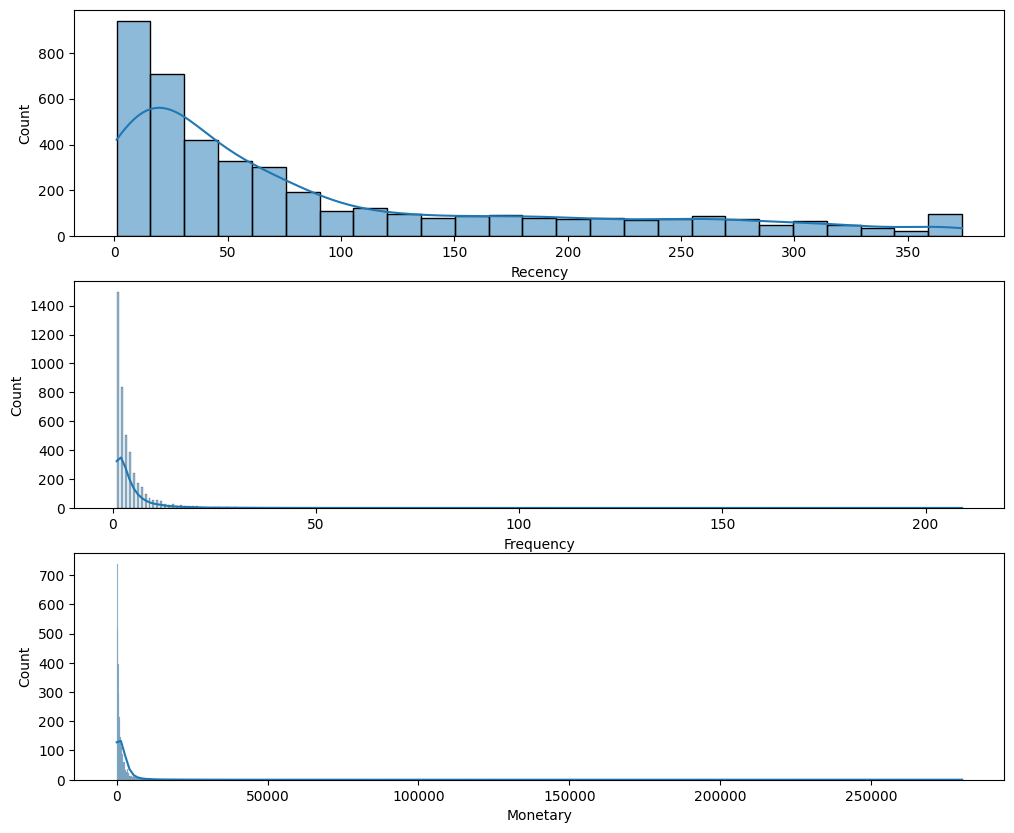

In [25]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.histplot(data = rfm['Recency'], kde = True)# Plot distribution of R
plt.subplot(3, 1, 2); sns.histplot(data = rfm['Frequency'], kde = True)# Plot distribution of F
plt.subplot(3, 1, 3); sns.histplot(data = rfm['Monetary'], kde = True)# Plot distribution of M
plt.show()# Show the plot

Terlihat bahwa ternyata data yang dihasilkan sangat menyimpang (skewed)

# R, F, M score



In [26]:
rfm["R_Score"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

rfm["F_Score"] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["M_Score"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [27]:
rfm['R_Score'] = rfm['R_Score'].astype(str)
rfm['F_Score'] = rfm['F_Score'].astype(str)
rfm['M_Score'] = rfm['M_Score'].astype(str)

In [28]:
rfm['RFM_Segment'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

In [29]:
rfm['RFM_Segment'].nunique()

118

Segment yang dihasilkan terlalu banyak, yaitu 118, perlu adanya penanganan agar segment yang dihasilkan menjadi lebih praktis

Salah satu metode yang paling mudah adalah menjumlahkan skor ke angka tunggal dan mendefinisikan level RFM untuk setiap rentang skor.

## RFM Score

In [30]:
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].sum(axis=1)

In [31]:
rfm

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
customerid,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7
12347.0,2,7,4310.00,5,5,5,555,15
12348.0,75,4,1797.24,2,4,4,244,10
12349.0,19,1,1757.55,4,1,4,414,9
12350.0,310,1,334.40,1,1,2,112,4
...,...,...,...,...,...,...,...,...
18280.0,278,1,180.60,1,2,1,121,4
18281.0,181,1,80.82,1,2,1,121,4
18282.0,8,2,178.05,5,3,1,531,9


In [32]:
rfm[rfm['RFM_Segment']=='111'].head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
customerid,,,,,,,,
12353.0,204,1,89.00,1,1,1,111,3
12361.0,287,1,189.90,1,1,1,111,3
12401.0,303,1,84.30,1,1,1,111,3
12402.0,323,1,225.60,1,1,1,111,3
12441.0,367,1,173.55,1,1,1,111,3


# RFM Score Summary



In [33]:
rfm.groupby('RFM_Score').agg({'Recency': 'mean','Frequency': 'mean',
                             'Monetary': ['mean', 'count'] }).round(2)

Recency Frequency  Monetary      
             mean      mean      mean count
RFM_Score                                  
3          286.46      1.00    144.31   183
4          238.29      1.01    215.29   361
5          176.86      1.10    289.30   337
6          123.99      1.32    382.63   426
7           98.33      1.59    708.12   377
8           85.36      1.99    671.43   375
9           71.36      2.50   1069.30   336
10          55.12      3.04   1042.97   342
11          41.90      3.86   1360.37   347
12          32.55      4.73   1788.97   321
13          24.50      6.53   3487.21   286
14          15.87      9.21   4491.71   300
15           5.45     18.25  11229.66   347

Terlihat bahwa perlu adanya penyederhanaan lebih lanjut terkait hal ini, untuk membantu kita dalam memahami RFM score ini lebih lanjut.

# RFM Level

In [34]:
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'

In [35]:
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
rfm

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,RFM_Level
customerid,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7,Loyal
12347.0,2,7,4310.00,5,5,5,555,15,Can't Loose Them
12348.0,75,4,1797.24,2,4,4,244,10,Can't Loose Them
12349.0,19,1,1757.55,4,1,4,414,9,Can't Loose Them
12350.0,310,1,334.40,1,1,2,112,4,Needs Attention
...,...,...,...,...,...,...,...,...,...
18280.0,278,1,180.60,1,2,1,121,4,Needs Attention
18281.0,181,1,80.82,1,2,1,121,4,Needs Attention
18282.0,8,2,178.05,5,3,1,531,9,Can't Loose Them


In [36]:
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(2)

In [37]:
rfm_level_agg

Recency Frequency Monetary      
                      mean      mean     mean count
RFM_Level                                          
Can't Loose Them     35.75      6.89  3511.99  2279
Champions            85.36      1.99   671.43   375
Loyal                98.33      1.59   708.12   377
Needs Attention     238.29      1.01   215.29   361
Potential           123.99      1.32   382.63   426
Promising           176.86      1.10   289.30   337
Require Activation  286.46      1.00   144.31   183

In [38]:
rfm_level_agg['Monetary']['count']/rfm_level_agg['Monetary']['count'].sum()*100

RFM_Level
Can't Loose Them      52.535731
Champions              8.644537
Loyal                  8.690641
Needs Attention        8.321807
Potential              9.820194
Promising              7.768557
Require Activation     4.218534
Name: count, dtype: float64

Terlihat bahwa lebih dari 50% data pelanggan merupakan pelanggan yang nilai RFM nya sangat tinggi, dimana perlu adanya servis tambahan dari toko untuk mempertahankan mereka

Untuk 48% lainnya, perlu adanya beberapa treatment khusus, yang di lansir dari
[sumber](https://towardsdatascience.com/recency-frequency-monetary-model-with-python-and-how-sephora-uses-it-to-optimize-their-google-d6a0707c5f17), antara lain:
* Potential — pelanggan yang berpotensi untuk menjadi loyal, dapat diberikan promo seperti beli 1 gratis 1, pada pembelian selanjutnya untuk menunjukkan kepada mereka bahwa toko menghargai mereka.
* Promising — ada tanda-tanda baik dan menjanjikan, hanya saja karena sudah lama tidak membeli sesuatu dari toko, sehingga salah satu caranya adalah dengan memberikan promo / diskon selama waktu tertentu untuk barang di keranjang barang keinginan mereka.
* Needs Attention — beberapa kali melakukan pembelian, setelah itu belum pernah melakukannya lagi. Perlu di cari tau, apakah karena pengalaman berbelanja yang buruk, atau ketidakcocokan antara produk dengan kebutuhan pelanggan. Perlu adanya langkah-langkah yang harus diterapkan untuk membangun kesadaran pelanggan terhadap keseriusan toko dalam melayani mereka.
* Require Activation — pelanggan yang ada kemungkinan sudah berpindah ke kompetitor, yang menyebabkan perlu adanya strategi aktivasi yang berbeda untuk menangani hal ini.




In [39]:
rfm_graph = rfm.copy()
rfm_graph['CustomerID'] = rfm_graph.index
#calculate sum of points for each team
rfm_graph = rfm_graph[['RFM_Level','CustomerID']].groupby(['RFM_Level']).count()
rfm_graph

,CustomerID
RFM_Level,
Can't Loose Them,2279
Champions,375
Loyal,377
Needs Attention,361
Potential,426
Promising,337
Require Activation,183


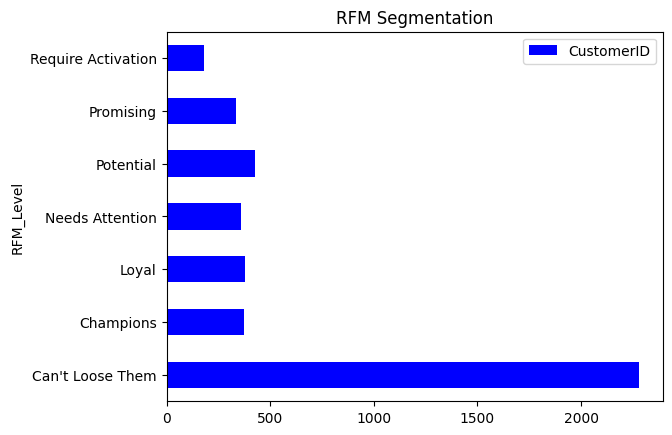

In [41]:
rfm_graph['RFM_Level'] = rfm_graph.index
rfm_graph.plot.barh(x='RFM_Level', y='CustomerID',
             title='RFM Segmentation', color='blue');

Untuk project selanjutnya, akan mencoba untuk menggali lebih dalam lagi terhadap 
[sumber](https://towardsdatascience.com/an-rfm-customer-segmentation-with-python-cf7be647733d) ini.